In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [28]:
color_dict = {"Norway": "#2B314D", "Denmark": "#A54836", "Sweden": "#5375D4", }
xy_ticklabel_color, grand_totals_color, grid_color, datalabels_color ='#757C85',"#101628", "#C8C9C9", "w"

data = {
    "year": [2004, 2022, 2004, 2022, 2004, 2022],
    "countries" : ["Sweden", "Sweden", "Denmark", "Denmark", "Norway", "Norway"],
    "sites": [13,15,4,10,5,8]
}

df= pd.DataFrame(data)  #df is the dataframe with data now
df

,year,countries,sites
0,2004,Sweden,13
1,2022,Sweden,15
2,2004,Denmark,4
3,2022,Denmark,10
4,2004,Norway,5
5,2022,Norway,8


In [29]:
df['sub_total'] = df.groupby('year')['sites'].transform('sum')

#custom sort
sort_order_dict = {"Denmark":2, "Sweden":3, "Norway":1, 2004:4, 2022:5}
df = df.sort_values(by=['year','countries',], key=lambda x: x.map(sort_order_dict))

#map the colors of a dict to a dataframe
df['color']= df.countries.map(color_dict)
df

,year,countries,sites,sub_total,color
4,2004,Norway,5,22,#2B314D
2,2004,Denmark,4,22,#A54836
0,2004,Sweden,13,22,#5375D4
5,2022,Norway,8,33,#2B314D
3,2022,Denmark,10,33,#A54836
1,2022,Sweden,15,33,#5375D4


In [30]:
unique_countries = df.countries.unique()
unique_year = df.year.unique()
years = df.year.unique()
colors = df.color
unique_sub_total = df.sub_total.unique()
sub_total = df.sub_total.unique()

[5 8]
[ 4 10]
[13 15]


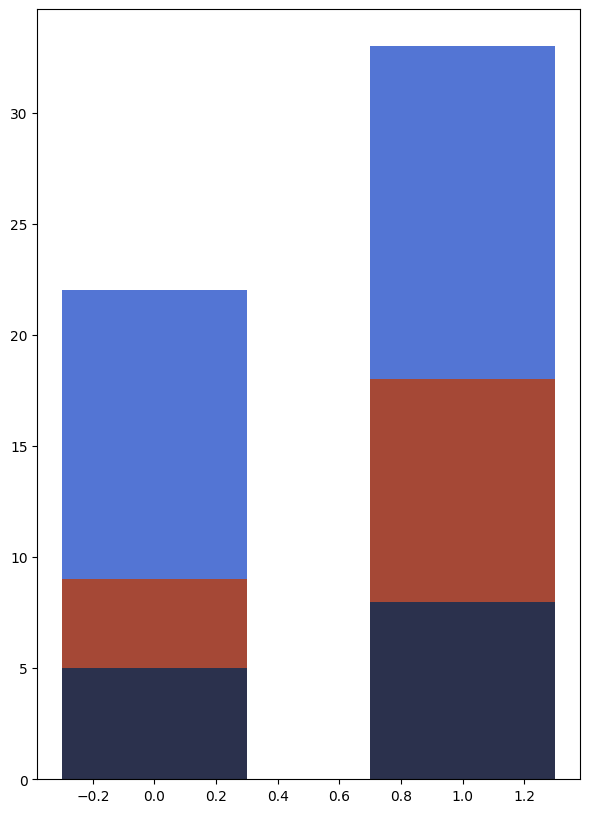

In [31]:
fig, ax = plt.subplots(figsize=(7,10), facecolor = "#FFFFFF" )
bottom = np.zeros(len(unique_year))    # used when you're building a stacked bar chart with Matplotlib
                                                                    #np.zeros(len(unique_year)) creates an array of zeros like [0.0, 0.0].
                                                                    #Tracks height of stacks for each year 
for country, color in zip(unique_countries, colors):                #for country,its color
    y = df[df["countries"] == country]["sites"].to_numpy()     #AS a numpy array, number of sites per year for independent country is stored
    print(y)
    ax.bar(range(len(unique_year)),y,bottom = bottom, width = 0.6,color=color)      #Stacked bars from bottom, added by y in next line with the country dependent color
    bottom +=y 


0 22
1 33


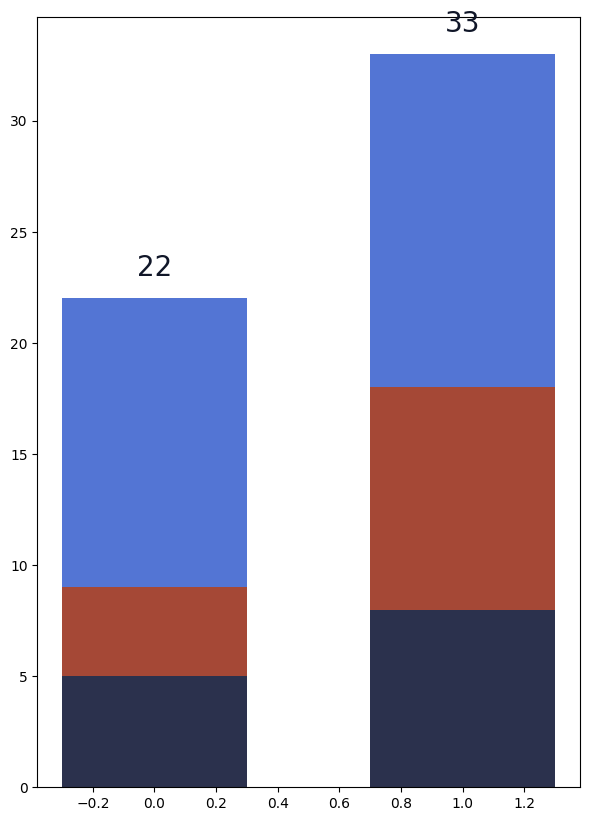

In [32]:
for i, total in enumerate(unique_sub_total):
    ax.text(i, total+1, total, ha = 'center', size = 20, color = grand_totals_color)
    print(i,total)


fig

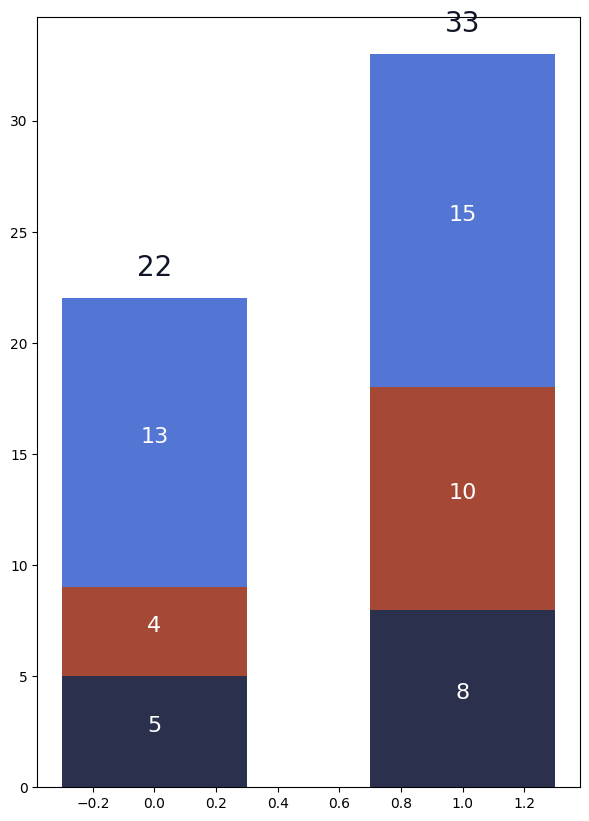

In [33]:
for bar in ax.patches:         #loop iterates over each bar in the chart.
    ax.text(
        bar.get_x() + bar.get_width() / 2,          #get_x() => x-coordinate of the left edge of the bar.
        bar.get_y() + bar.get_height()/2 ,
        round(bar.get_height()),                    #round this value for better presentation, ensuring you get a whole number
        ha ='center', color = datalabels_color, size = 16       #Horizontal alignment
    )

fig

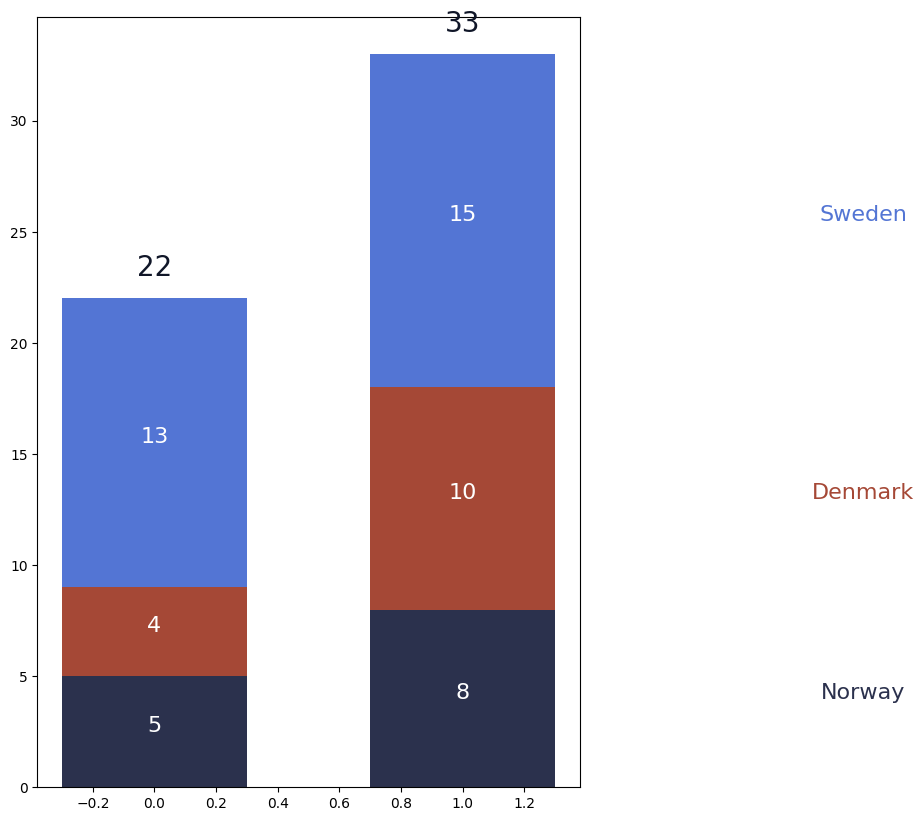

In [34]:
offset_text = 1                 #ax.patches => contains all bars in the plot
for bar, country, color in zip(ax.patches[len(unique_year)-1::len(unique_year)], unique_countries, colors):     # The zip function combines the three lists (ax.patches, unique_countries, and colors) so that each iteration gives you one bar, country, and color.and is a slice that selects the last bar of each group of bars (assuming bars are stacked and you want to label the topmost bar for each year). This will ensure that only the last bar for each country is selected for labeling.
    ax.text(
        bar.get_x() + bar.get_width() +offset_text,
        bar.get_y() + bar.get_height()/2,
        country,
        ha = 'center', color = color ,size =16
    )
fig

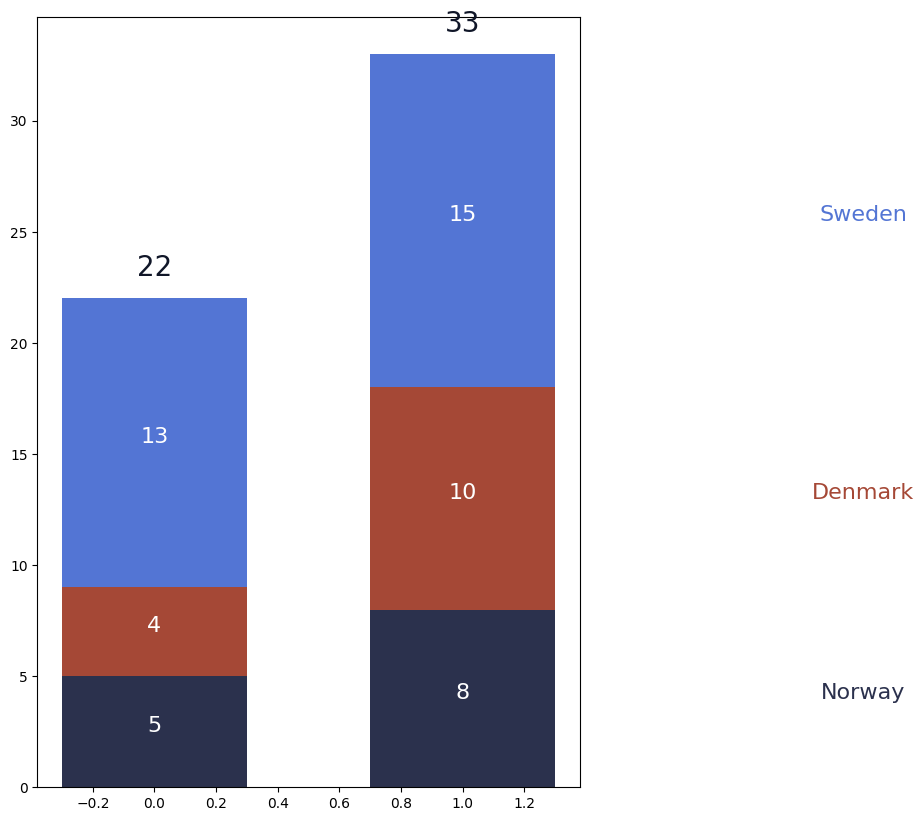

In [35]:
ax.tick_params( axis='both', which='minor', length=0, labelsize=16, colors= xy_ticklabel_color, pad =15)        #for both axes, ticks are removed and labels are updated.
fig

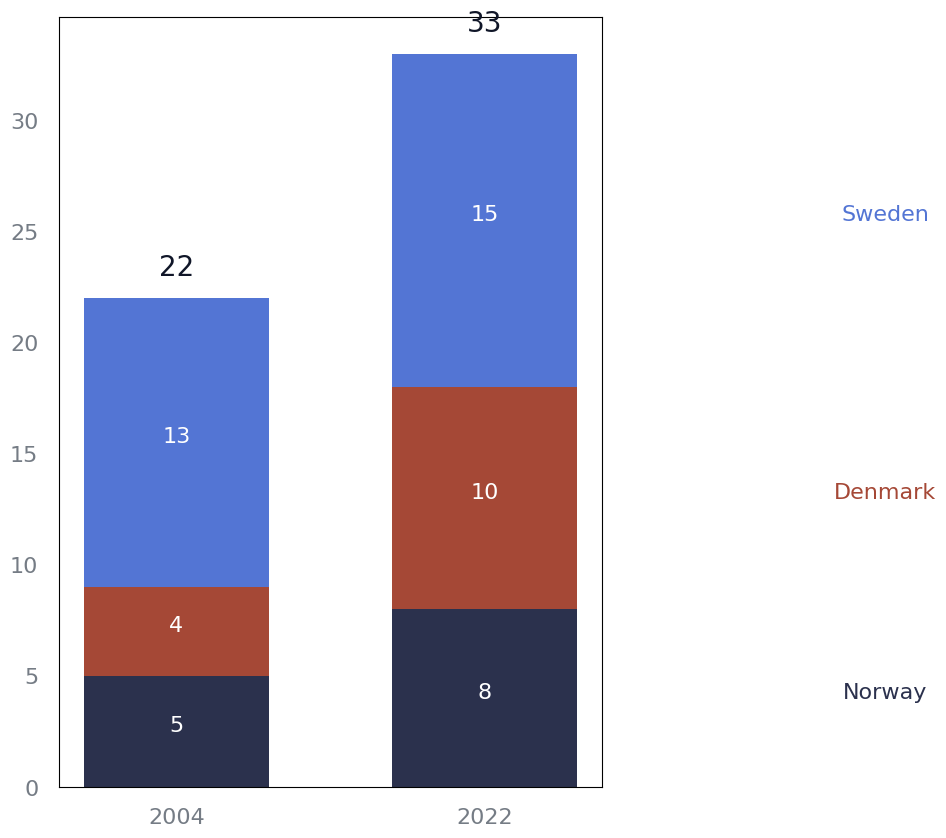

In [36]:
ax.tick_params( axis='both', which='major', length=0, labelsize=16, colors= xy_ticklabel_color, pad =15)        #for both axes, ticks are removed and labels are updated.
ax.xaxis.set_ticks(range(len(years)), labels =years)            #SETs years as label in xaxis ticks

fig

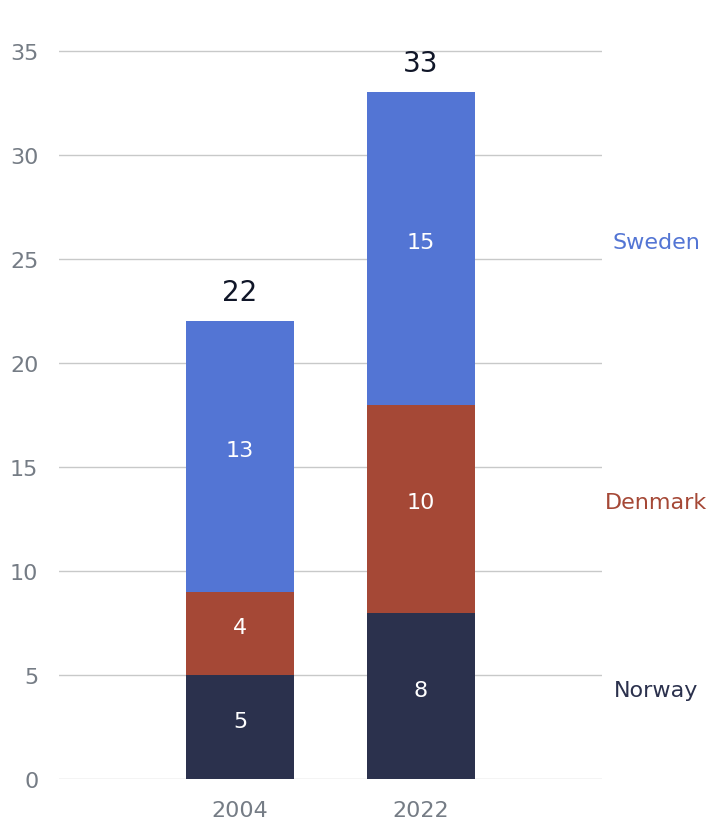

In [37]:
ax.set_axisbelow(True)              #set the grid lines in the BACK
ax.grid(True, axis='y', linestyle='solid',  linewidth=1, color = grid_color)
ax.set_xlim(-1,len(years))
ax.set_ylim(0,df.sub_total.max()+4)
ax.spines[['left', 'right', 'top', 'bottom']].set_visible(False)    #removes the plot borders

fig

In [40]:
import os
import IPython

s = IPython.extract_module_locals()[1]['__vsc_ipynb_file__']
filename = os.path.splitext(os.path.basename(s))[0]
save_path = os.path.join(
    r'C:\Users\mhdih\OneDrive\Desktop\git\check_1\1v100\images',
    filename + '.png'
)

fig.savefig(save_path, bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=False, dpi=600)
